In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Question 1**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dataset1 = pd.read_csv("/content/drive/MyDrive/prml/lab-2/ENB2012_data.xlsx - Φύλλο1.csv")
dataset1 = dataset1.astype(str)
dataset1.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.9,563.5,318.5,122.5,7.0,2,0.0,0,20.84


In [3]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      768 non-null    object
 1   X2      768 non-null    object
 2   X3      768 non-null    object
 3   X4      768 non-null    object
 4   X5      768 non-null    object
 5   X6      768 non-null    object
 6   X7      768 non-null    object
 7   X8      768 non-null    object
 8   Y1      768 non-null    object
dtypes: object(9)
memory usage: 54.1+ KB


### **1) Preprocessing and Splitting the data**

In [4]:
print(dataset1['X5'].value_counts())
print('\n',dataset1['X6'].value_counts())

7.0    384
3.5    384
Name: X5, dtype: int64

 2    192
3    192
4    192
5    192
Name: X6, dtype: int64


In [5]:
##We can see in the dataset X5 and X6 are found to be categorical label(orientation)
#Therefore, creating dummy values
# x5 = pd.get_dummies(dataset1['X5'],drop_first=True)
x6 = pd.get_dummies(dataset1['X6'],drop_first=True)

In [6]:
##Adding these new columns to the dataset
dataset1 = pd.concat([dataset1,x6],axis=1)
dataset1.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,3,4,5
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,0,0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,1,0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,0,1,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,0,0,1
4,0.9,563.5,318.5,122.5,7.0,2,0.0,0,20.84,0,0,0


In [7]:
##Dropping the columns
dataset1.drop(['X6'],axis=1,inplace=True)
dataset1.head()

,X1,X2,X3,X4,X5,X7,X8,Y1,3,4,5
0,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,0,0,0
1,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,1,0,0
2,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,0,1,0
3,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,0,0,1
4,0.9,563.5,318.5,122.5,7.0,0.0,0,20.84,0,0,0


In the above dataset:

*   X6 column is replaced by 3, 4 and 5 columns



In [8]:
from sklearn.model_selection import train_test_split

X_q1 = dataset1.drop("Y1",axis=1)
y_q1 = dataset1['Y1']

#Splitting the dataset
X_train_set_q1, X_test_set_q1 = train_test_split(X_q1, test_size=0.2, random_state=42)
y_train_set_q1, y_test_set_q1 = train_test_split(y_q1, test_size=0.2, random_state=42)

X_train_set_q1, X_val_set_q1 = train_test_split(X_train_set_q1, test_size=0.125, random_state=42)
y_train_set_q1, y_val_set_q1 = train_test_split(y_train_set_q1, test_size=0.125, random_state=42)

'''Data preprocessing complete'''

'Data preprocessing complete'

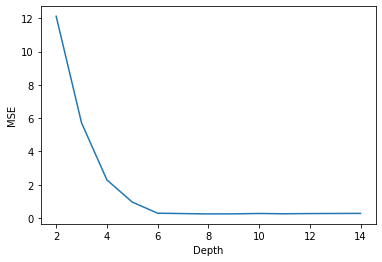

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

depths=[]
sample_splits=[]
sample_leaves=[]
ms_errors=[]

#Variation of MSE with max_depth
for depth in range(2,15):
  tree_depth=DecisionTreeRegressor(max_depth=depth)
  tree_depth.fit(X_train_set_q1, y_train_set_q1)
  y_pred_depth=tree_depth.predict(X_val_set_q1)
  mse=mean_squared_error(y_pred_depth, y_val_set_q1)  
  ms_errors.append(mse)
  depths.append(depth)

plt.plot(depths, ms_errors)
plt.xlabel('Depth')
plt.ylabel('MSE')
plt.show()



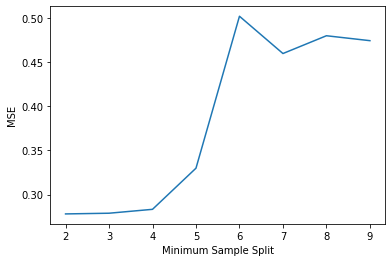

In [10]:
ms_errors=[]

#Variation of MSE with min_sample_split
for ss in range(2,10):
  tree_mss=DecisionTreeRegressor(min_samples_split=ss)
  tree_mss.fit(X_train_set_q1, y_train_set_q1)
  y_pred_mss=tree_mss.predict(X_val_set_q1)
  mse=mean_squared_error(y_pred_mss, y_val_set_q1)  
  ms_errors.append(mse)
  sample_splits.append(ss)

plt.plot(sample_splits, ms_errors)
plt.xlabel('Minimum Sample Split')
plt.ylabel('MSE')
plt.show()

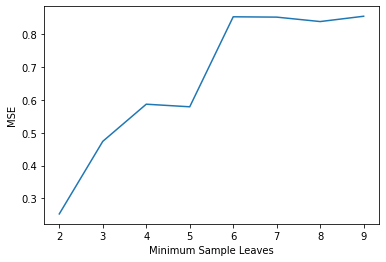

In [11]:
ms_errors=[]

#Variation of MSE with min_sample_leaf
for sl in range(2,10):
  tree_msl=DecisionTreeRegressor(min_samples_leaf=sl)
  tree_msl.fit(X_train_set_q1, y_train_set_q1)
  y_pred_msl=tree_msl.predict(X_val_set_q1)
  mse=mean_squared_error(y_pred_msl, y_val_set_q1)  
  ms_errors.append(mse)
  sample_leaves.append(sl)

plt.plot(sample_leaves, ms_errors)
plt.xlabel('Minimum Sample Leaves')
plt.ylabel('MSE')
plt.show()

In [12]:
ms_errors=[]
mse_best=9999999
best_params = {}

def best_parameters(X_train,y_train,X_val,y_val,mse_best):
  for depth in range(2,30):
    for ss in range(2,12):
      for sl in range(1,10):
        tree_regression = DecisionTreeRegressor(max_depth=depth, min_samples_split=ss, min_samples_leaf=sl)
        tree_regression.fit(X_train,y_train)
        y_pred_regression=tree_regression.predict(X_val)
        mse=mean_squared_error(y_pred_regression,y_val)
        if mse<mse_best:
          mse_best=mse
          best_params['Depth'] = depth
          best_params['Sample_Split'] = ss
          best_params['Sample_Leaf'] = sl
         
  return best_params

bp = best_parameters(X_train_set_q1, y_train_set_q1, X_val_set_q1, y_val_set_q1, mse_best)
print(bp)

{'Depth': 7, 'Sample_Split': 5, 'Sample_Leaf': 2}


In [13]:
#Training model with the Optical hyper-parameters
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

tree_best = DecisionTreeClassifier(max_depth=bp["Depth"], min_samples_split=bp["Sample_Split"], min_samples_leaf=bp["Sample_Leaf"])

#Hold-Out Cross Validation
tree_best.fit(X_train_set_q1,y_train_set_q1)

y_pred_hcv = tree_best.predict(X_test_set_q1)
acc_score_hcv = accuracy_score(y_test_set_q1, y_pred_hcv)
print("Accuracy Score in Hold Out Cross Validation: ",acc_score_hcv)
print('\n')

#5 Fold Cross Validation
acc_scores_5fcv = cross_val_score(tree_best, X_train_set_q1, y_train_set_q1, cv=5)
print("Accuracy Scores in 5 fold Cross Validation")
print(acc_scores_5fcv)
print("Mean Accuracy Score in 5 fold cross validation is:",acc_scores_5fcv.mean())
print("\n")

#Repeated 5 Fold Cross Validation
rcv = RepeatedKFold(n_splits=5, n_repeats=10)
accuracies_rcv = []

#Iterating over the splits and repetitions
for train_index, test_index in rcv.split(X_q1,y_q1):
    # Split the data into training and test sets
    X_train_rcv, X_test_rcv = X_q1.iloc[train_index], X_q1.iloc[test_index]
    y_train_rcv, y_test_rcv = y_q1[train_index], y_q1[test_index]

    tree_best.fit(X_train_rcv, y_train_rcv)
    y_pred_rcv = tree_best.predict(X_test_rcv)

    acc_rcv = accuracy_score(y_test_rcv, y_pred_rcv)
    accuracies_rcv.append(acc_rcv)

mean_rcv = np.mean(accuracies_rcv)
print("\nMean Accuracy Score in Repeated 5 fold cross validation is:",mean_rcv)


Accuracy Score in Hold Out Cross Validation:  0.025974025974025976


Accuracy Scores in 5 fold Cross Validation
[0.03703704 0.00925926 0.03738318 0.00934579 0.00934579]
Mean Accuracy Score in 5 fold cross validation is: 0.020474212530287295




/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Mean Accuracy Score in Repeated 5 fold cross validation is: 0.029696969696969697


In [14]:
#Calculating mean squared error between the predicted and the ground-truth values in the test data
tree_best.fit(X_train_set_q1,y_train_set_q1)
y_pred_best = tree_best.predict(X_test_set_q1)
print(mean_squared_error(y_pred_best,y_test_set_q1))

8.092903896103897


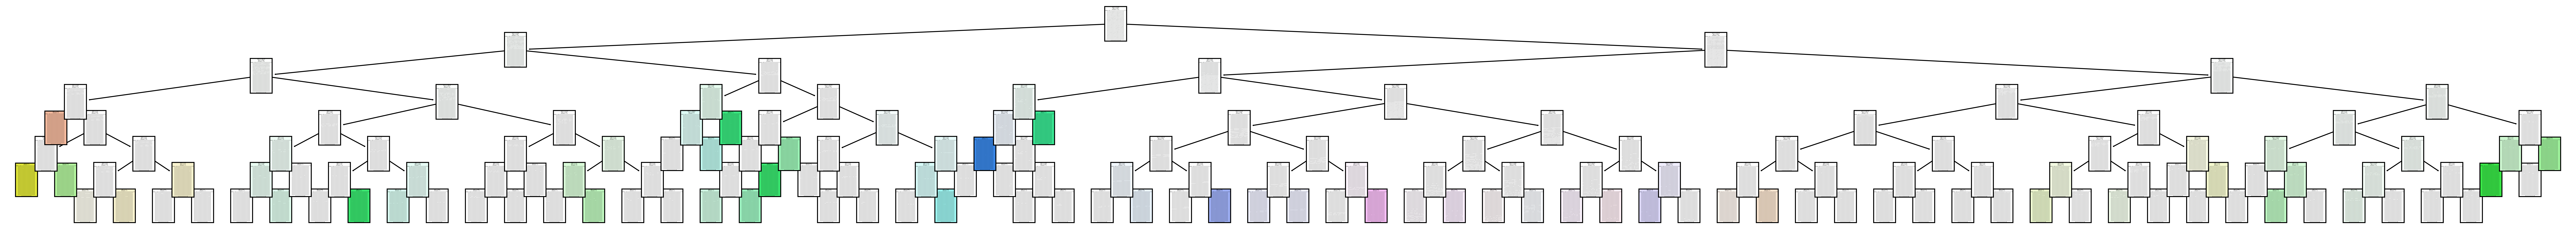

In [15]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(48,4), dpi=500)
tree.plot_tree(tree_best, feature_names=list(dataset1.columns.values).remove("Y1"),filled=True)
fig.savefig('tree_best.png')

## **Question 2**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

dataset2 = pd.read_csv("/content/drive/MyDrive/prml/lab-2/Iris.csv")

## **Classification**
### **Part 1**

In [17]:
dataset2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [19]:
dataset2.drop(['Id','SepalLengthCm','SepalWidthCm'],axis=1,inplace=True)
dataset2.head()

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


In [20]:
dataset2 = dataset2.replace({'Species': {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2}})
dataset2.head()

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [21]:
X_q2_clas = dataset2.drop('Species',axis=1)
y_q2_clas = dataset2['Species']

In [22]:
from sklearn.model_selection import train_test_split

X_train_clas, X_test_clas, y_train_clas, y_test_clas = train_test_split(X_q2_clas, y_q2_clas, test_size=0.2, random_state=42)

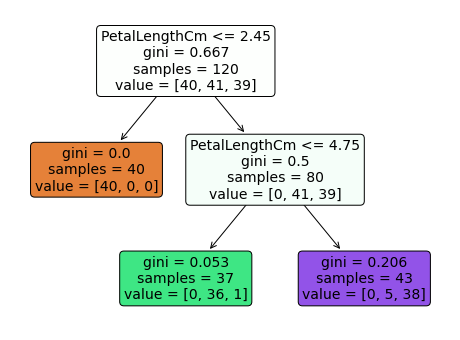

In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

##Creating Decision Tree Classifier with max_depth=2
dtc = DecisionTreeClassifier(max_depth=2)

#Fitting the training data to the model
dtc.fit(X_train_clas, y_train_clas)

#Using the trained model to predict the classes for the testing data
y_pred_depth2 = dtc.predict(X_test_clas)

#Plotting the decision boundaries of the tree and indicating the depth at which each split was made
fig, ax = plt.subplots(figsize=(8, 6))
plot_tree(dtc, ax=ax, filled=True, rounded=True, fontsize=14, feature_names=X_train_clas.columns)

plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


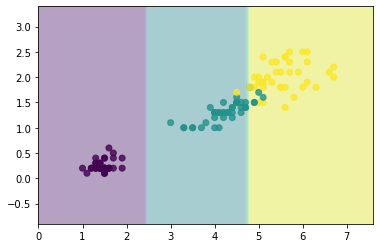

In [24]:
#Plotting Decision Boundary for the tree
# Creating a grid of points in the feature space
x_min, x_max = X_train_clas.iloc[:,0].min() - 1, X_train_clas.iloc[:,0].max() + 1
y_min, y_max = X_train_clas.iloc[:, 1].min() - 1, X_train_clas.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))


xegrid =np.arange(x_min, x_max, 0.1)
xfgrid = np.arange(y_min, y_max, 0.1)
xxx, yyy = np.meshgrid(xegrid, xfgrid)
y_pred = dtc.predict(np.c_[xxx.ravel(), yyy.ravel()]).reshape(xxx.shape)

# Plotting the decision boundary
plt.contourf(xx, yy, y_pred, alpha=0.4)

# Plotting the training points
plt.scatter(X_train_clas.iloc[:, 0], X_train_clas.iloc[:, 1], c=y_train_clas, alpha=0.8)
plt.show()

### **Part 2**

In [25]:
#First, identifying the widest Iris-Versicolor
mask = (X_train_clas['PetalLengthCm'] == 4.8) & (X_train_clas['PetalWidthCm'] == 1.8) & (y_train_clas == 1)
mask_test = (X_test_clas['PetalLengthCm'] == 4.8) & (X_test_clas['PetalWidthCm'] == 1.8) & (y_test_clas == 1)

#Removing the widest Iris-Versicolor from the training set and testing set
X_train_clas_mod = X_train_clas[~mask]
y_train_clas_mod = y_train_clas[~mask]
X_test_clas_mod = X_test_clas[~mask_test]
y_test_clas_mod = y_test_clas[~mask_test]

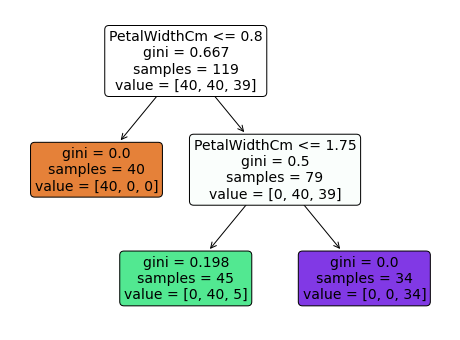

In [26]:
#Training a Decision Tree on the modified training set
##Creating Decision Tree Classifier with max_depth=2
dtc_modified = DecisionTreeClassifier(max_depth=2)

#Fitting the training data to the model
dtc_modified.fit(X_train_clas_mod, y_train_clas_mod)

#Using the trained model to predict the classes for the testing data
y_pred_modified = dtc_modified.predict(X_test_clas_mod)

#Plotting the decision boundaries of the tree and indicating the depth at which each split was made
fig, ax = plt.subplots(figsize=(8, 6))
plot_tree(dtc_modified, ax=ax, filled=True, rounded=True, fontsize=14, feature_names=X_train_clas_mod.columns)

plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


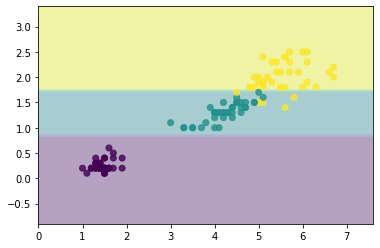

In [27]:
#Plotting Decision Boundary for the modified training set
# Creating a grid of points in the feature space
x_min_mod, x_max_mod = X_train_clas_mod.iloc[:,0].min() - 1, X_train_clas_mod.iloc[:,0].max() + 1
y_min_mod, y_max_mod = X_train_clas_mod.iloc[:, 1].min() - 1, X_train_clas_mod.iloc[:, 1].max() + 1
xx_mod, yy_mod = np.meshgrid(np.arange(x_min_mod, x_max_mod, 0.1),np.arange(y_min_mod, y_max_mod, 0.1))

# y_pred_modified = y_pred_modified.reshape(xx_mod.shape)
xegrid_mod =np.arange(x_min_mod, x_max_mod, 0.1)
xfgrid_mod = np.arange(y_min_mod, y_max_mod, 0.1)
xxx_mod, yyy_mod = np.meshgrid(xegrid_mod, xfgrid_mod)
y_pred_modified = dtc_modified.predict(np.c_[xxx_mod.ravel(), yyy_mod.ravel()]).reshape(xxx_mod.shape)

# Plotting the decision boundary
plt.contourf(xx_mod, yy_mod, y_pred_modified, alpha=0.4)

# Plotting the training points
plt.scatter(X_train_clas_mod.iloc[:, 0], X_train_clas_mod.iloc[:, 1], c=y_train_clas_mod, alpha=0.8)
plt.show()

### **Part 3**

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


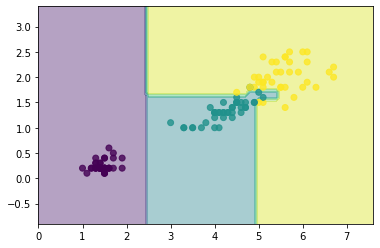

In [28]:
#Training Decision Tree with max_depth=None
dtc_partthree = DecisionTreeClassifier(max_depth=None)
dtc_partthree.fit(X_train_clas, y_train_clas)

#Plotting Decision Boundary
# Creating a grid of points in the feature space
x_min_three, x_max_three = X_train_clas.iloc[:,0].min() - 1, X_train_clas.iloc[:,0].max() + 1
y_min_three, y_max_three = X_train_clas.iloc[:, 1].min() - 1, X_train_clas.iloc[:, 1].max() + 1
xx_three, yy_three = np.meshgrid(np.arange(x_min_three, x_max_three, 0.1),np.arange(y_min_three, y_max_three, 0.1))

xegrid_three =np.arange(x_min_three, x_max_three, 0.1)
xfgrid_three = np.arange(y_min_three, y_max_three, 0.1)
xxx_three, yyy_three = np.meshgrid(xegrid_three, xfgrid_three)
y_pred_three = dtc_partthree.predict(np.c_[xxx_three.ravel(), yyy_three.ravel()]).reshape(xxx_three.shape)

# Plotting the decision boundary
plt.contourf(xx_three, yy_three, y_pred_three, alpha=0.4)

# Plotting the training points
plt.scatter(X_train_clas.iloc[:, 0], X_train_clas.iloc[:, 1], c=y_train_clas, alpha=0.8)
plt.show()

### Comparing and Analysing Part 1 results and Part 3 results

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

##Evaluating the performance of the decision tree classifier with max depth=2
#Pedicting the values is done in part 1
accuracy_depth2 = accuracy_score(y_test_clas, y_pred_depth2)
precision_depth2 = precision_score(y_test_clas, y_pred_depth2, average='macro')
recall_depth2 = recall_score(y_test_clas, y_pred_depth2, average='macro')
f1_depth2 = f1_score(y_test_clas, y_pred_depth2, average='macro')

##Evaluating the performance of the decision tree classifier with max depth=None
y_pred_depthNone = dtc_partthree.predict(X_test_clas)
accuracy_depthNone = accuracy_score(y_test_clas, y_pred_depthNone)
precision_depthNone = precision_score(y_test_clas, y_pred_depthNone, average='macro')
recall_depthNone = recall_score(y_test_clas, y_pred_depthNone, average='macro')
f1_depthNone = f1_score(y_test_clas, y_pred_depthNone, average='macro')

# Print the results
print("Decision tree classifier with max depth=2:")
print("Accuracy: ", accuracy_depth2)
print("Precision: ", precision_depth2)
print("Recall: ", recall_depth2)
print("F1 score: ", f1_depth2)

print('\n')

print("Decision tree classifier with max depth=None:")
print("Accuracy: ", accuracy_depthNone)
print("Precision: ", precision_depthNone)
print("Recall: ", recall_depthNone)
print("F1 score: ", f1_depthNone)


Decision tree classifier with max depth=2:
Accuracy:  0.9666666666666667
Precision:  0.9722222222222222
Recall:  0.9629629629629629
F1 score:  0.9658994032395567


Decision tree classifier with max depth=None:
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 score:  1.0


### **Part 4**

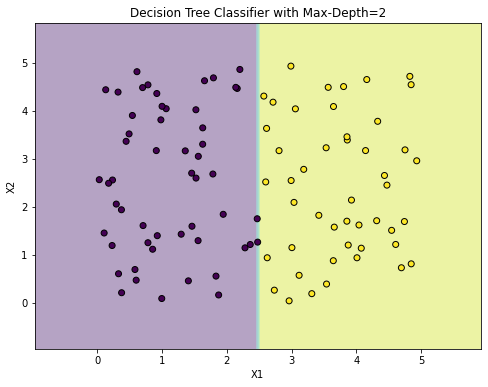

In [30]:
from sklearn.model_selection import train_test_split

##Creating the random dataset having 2 attributes and 2 classes
np.random.seed(42)
X1 = np.random.uniform(low=0, high=5, size=100)
X2 = np.random.uniform(low=0, high=5, size=100)
X_part4 = np.column_stack((X1, X2))
y_part4 = np.where(X1 < 2.5, 0, 1)

#Splitting the dataset
X_part4_train, X_part4_test, y_part4_train, y_part4_test = train_test_split(X_part4, y_part4, test_size=0.3, random_state=42)

#Training decision tree with max depth=2
tree_part4 = DecisionTreeClassifier(max_depth=2)
tree_part4.fit(X_part4_train,y_part4_train)

#Plotting Decision Boundaries
fig, ax = plt.subplots(figsize=(8, 6))

# Generate a grid of points to plot decision boundaries
x_min_part4, x_max_part4 = X_part4[:, 0].min() - 1, X_part4[:, 0].max() + 1
y_min_part4, y_max_part4 = X_part4[:, 1].min() - 1, X_part4[:, 1].max() + 1
xx_part4, yy_part4 = np.meshgrid(np.arange(x_min_part4, x_max_part4, 0.1), np.arange(y_min_part4, y_max_part4, 0.1))
Z_part4 = tree_part4.predict(np.c_[xx_part4.ravel(), yy_part4.ravel()])
Z_part4 = Z_part4.reshape(xx_part4.shape)

# Plot decision boundaries and data points
ax.contourf(xx_part4, yy_part4, Z_part4, alpha=0.4)
ax.scatter(X_part4[:, 0], X_part4[:, 1], c=y_part4, cmap='viridis', edgecolors='k')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Decision Tree Classifier with Max-Depth=2')
plt.show()


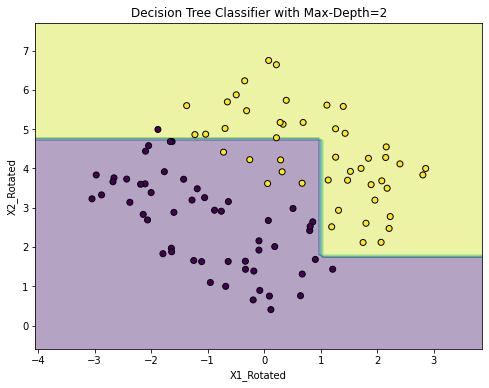

In [31]:
#Rotating the datapoints by 45 degrees clockwise about origin
theta = np.radians(-45)
X1_rotated = (X1 * np.cos(theta)) + (X2 * np.sin(theta))
X2_rotated = (X2 * np.cos(theta)) - (X1 * np.sin(theta))

# Train a decision tree classifier with max_depth=2
tree_part4_rotated = DecisionTreeClassifier(max_depth=2, random_state=42)
X_part4_rotated = np.column_stack((X1_rotated, X2_rotated))
tree_part4_rotated.fit(X_part4_rotated, y_part4)

#Plotting Decision Boundaries
fig, ax = plt.subplots(figsize=(8, 6))

# Generate a grid of points to plot decision boundaries
x_min_part4_rotated, x_max_part4_rotated = X_part4_rotated[:, 0].min() - 1, X_part4_rotated[:, 0].max() + 1
y_min_part4_rotated, y_max_part4_rotated = X_part4_rotated[:, 1].min() - 1, X_part4_rotated[:, 1].max() + 1
xx_part4_rotated, yy_part4_rotated = np.meshgrid(np.arange(x_min_part4_rotated, x_max_part4_rotated, 0.1), np.arange(y_min_part4_rotated, y_max_part4_rotated, 0.1))
Z_part4_rotated = tree_part4_rotated.predict(np.c_[xx_part4_rotated.ravel(), yy_part4_rotated.ravel()])
Z_part4_rotated = Z_part4_rotated.reshape(xx_part4_rotated.shape)

# Plot decision boundaries and data points
ax.contourf(xx_part4_rotated, yy_part4_rotated, Z_part4_rotated, alpha=0.4)
ax.scatter(X_part4_rotated[:, 0], X_part4_rotated[:, 1], c=y_part4, cmap='viridis', edgecolors='k')
ax.set_xlabel('X1_Rotated')
ax.set_ylabel('X2_Rotated')
ax.set_title('Decision Tree Classifier with Max-Depth=2')
plt.show()

### Comparing the plots obtained
Since the dataset was rotated by 45 degrees in the second method, the decision boundaries obtained by the two methods would be different. The decision boundary obtained in the first method (without rotation) will be a straight line passing through (2.5, 0) and separating the two classes. On the other hand, the decision boundary obtained in the second method (with rotation) will be a line separating the two classes.
Rotating the dataset can change the orientation and distribution of the data points, and therefore can affect the decision boundary obtained by the classifier

### **Part 5**

In part 2 the decision tree classifier has given the max_depth=2 and it is trained on the training set and the decision boundary is plotted.

In part 3 the decision tree classifier 
has given the max_depth=None and it is trained on the training set and the decision boundary is plotted.

In part 4 the decision tree classifier has given the max_depth=2 and it is trained on the training set and the decision boundary is plotted.

By doing all these we can observe that the decision tree classifier gives better accuracy for part 4 and then part 3 and finally part 2  


## **Regression**

### **Part 1**

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset_reg = pd.read_csv("/content/drive/MyDrive/prml/lab-2/task.csv")
dataset_reg.head()

,X,Y
0,0.374540,-0.005042
1,0.950714,0.835799
2,0.731994,0.244592
3,0.598658,-0.032501
4,0.156019,0.659870


In [33]:
from sklearn.model_selection import train_test_split

X_reg = dataset_reg['X']
y_reg = dataset_reg['Y']

#Splitting the dataset into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

X_train_reg = np.array(X_train_reg).reshape(-1,1)
X_test_reg = np.array(X_test_reg).reshape(-1,1)


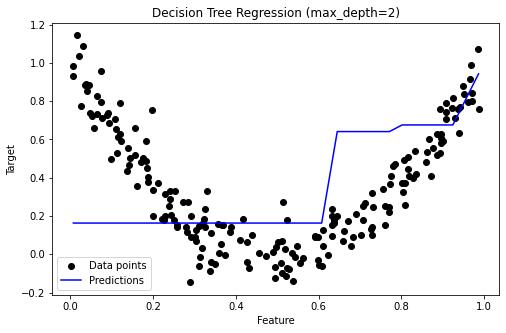

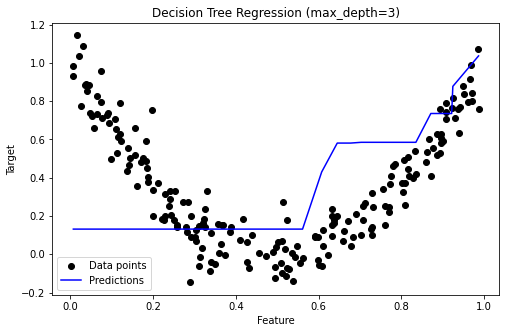

In [34]:
from sklearn.tree import DecisionTreeRegressor

tree2 = DecisionTreeRegressor(max_depth=2)
tree2.fit(X_train_reg, y_train_reg)

tree3 = DecisionTreeRegressor(max_depth=3)
tree3.fit(X_train_reg, y_train_reg)

y_pred_2 = tree2.predict(X_test_reg)
y_pred_3 = tree3.predict(X_test_reg)

depths = [2, 3]

for depth in depths:
    plt.figure(figsize=(8, 5))
    y_pred_2 = pd.DataFrame(y_pred_2)
    y_pred_3 = pd.DataFrame(y_pred_3)
    X_test_regin=pd.DataFrame(X_test_reg)
    plt.scatter(X_reg, y_reg, color='black', label='Data points')
    plt.plot(X_test_regin[0].sort_values(),y_pred_2[0].sort_values() if depth == 2 else y_pred_3[0].sort_values(), color='blue', label='Predictions')
    plt.title('Decision Tree Regression (max_depth={})'.format(depth))
    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.legend()
    plt.show()


When max_depth=2 this means that the tree will be limited to making only one split in data. This results in simple model with limited capacity.
As a result, the predictions may be biased and have less variance

When max_depth=3 this means that the tree will be able to make two splits in data. This results in a more complex model compared to previous one. The predictions may be less biased and have lower variance compared to previous model.


### **Part 2**

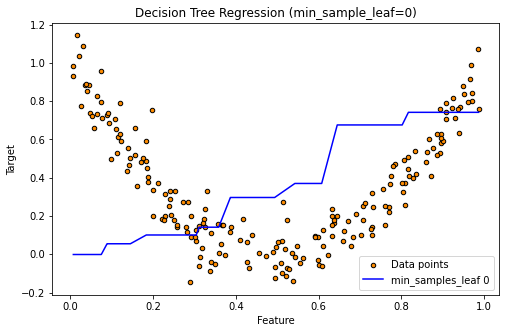

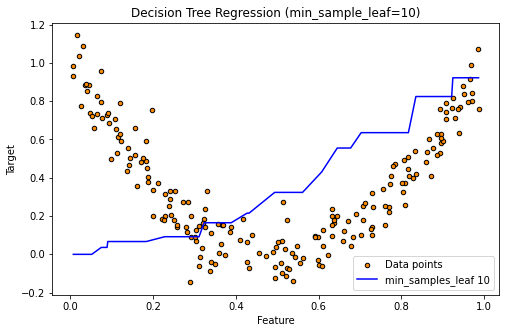

In [35]:
from sklearn.tree import DecisionTreeRegressor

#Training decision tree models with varying min_samples_leaf
tree0 = DecisionTreeRegressor(min_samples_leaf=0.1, random_state=42)
tree0.fit(X_train_reg, y_train_reg)

tree10 = DecisionTreeRegressor(min_samples_leaf=10, random_state=42)
tree10.fit(X_train_reg, y_train_reg)

y_pred_0 = tree0.predict(X_test_reg)
y_pred_10 = tree10.predict(X_test_reg)

min_sample_leaves = [0, 10]

for leaf in min_sample_leaves:
    plt.figure(figsize=(8, 5))
    y_pred_0 = pd.DataFrame(y_pred_0)
    y_pred_10 = pd.DataFrame(y_pred_10)
    X_test_regin=pd.DataFrame(X_test_reg)
    plt.scatter(X_reg, y_reg, s=20, edgecolor="black", c="darkorange", label='Data points')
    plt.plot(X_test_regin[0].sort_values(),y_pred_0[0].sort_values() if leaf == 0 else y_pred_10[0].sort_values(), color='blue', label="min_samples_leaf %d" % (leaf))
    plt.title('Decision Tree Regression (min_sample_leaf={})'.format(leaf))
    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.legend()
    plt.show()


A smaller min_samples_leaf allows the decision tree to fit the data more closely. A larger min_samples_leaf can prevent overfitting by creating a simpler model with less variance

## **Question 3**

### Cost function to be implemented is **Gini Index**

### **Part 1**
### Performing pre-processing and visualisation of the dataset. Performing categorical encoding wherever applicable and split the dataset into train and test sets

In [36]:
pip install palmerpenguins

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from palmerpenguins import load_penguins
sns.set_style('whitegrid')

In [38]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [39]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [40]:
#Some missing values are present in columns bill_length, bill_depth, flipper_length, body_mass, sex
#So dropping the missing values from these columns
penguins.dropna(inplace=True)
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


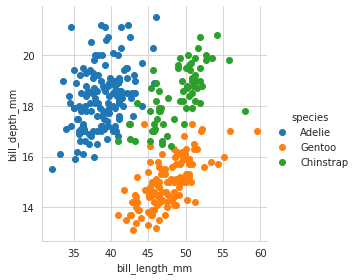

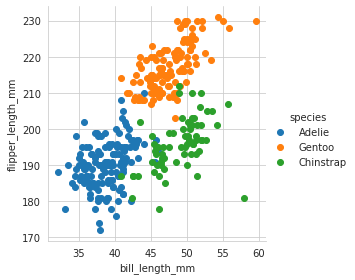

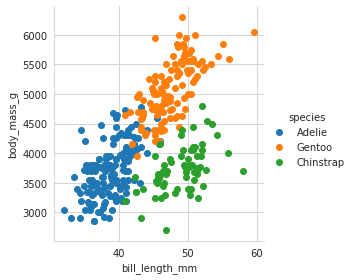

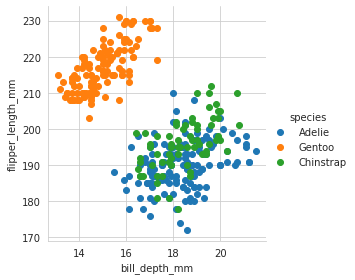

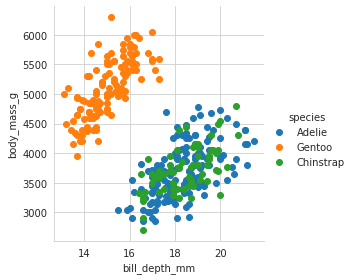

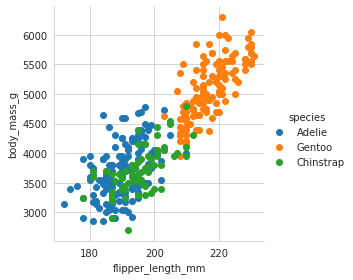

In [41]:
f = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

for i in range(4):
  for j in range(i+1,4):
    sns.FacetGrid(penguins, hue='species', height=4).map(plt.scatter, f[i],f[j]).add_legend()


 Adelie       0.438438
Gentoo       0.357357
Chinstrap    0.204204
Name: species, dtype: float64


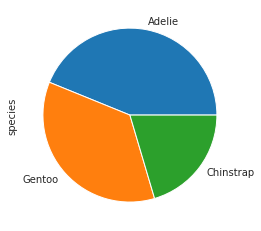


 Biscoe       0.489489
Dream        0.369369
Torgersen    0.141141
Name: island, dtype: float64


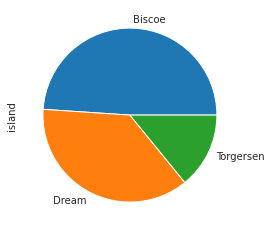


 male      0.504505
female    0.495495
Name: sex, dtype: float64


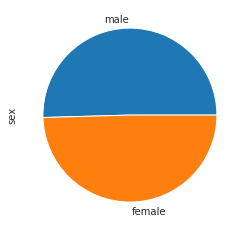


 2009    0.351351
2008    0.339339
2007    0.309309
Name: year, dtype: float64


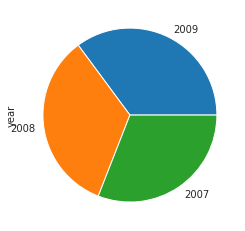

In [42]:
fea = ['species','island','sex','year']

for i in fea:
  print('\n',penguins[i].value_counts()/len(penguins))
  fig,ax = plt.subplots()
  penguins[i].value_counts().plot(ax=ax, kind='pie')
  plt.show()

### **Encoding the dataset**

In [43]:
##Converting the string values of a column into dummy values of 0 and 1
Gender = pd.get_dummies(penguins['sex'],drop_first=True)
Island = pd.get_dummies(penguins['island'],drop_first=True)
Year = pd.get_dummies(penguins['year'],drop_first=True)

In [44]:
##Adding these new columns to the dataset
penguins = pd.concat([penguins,Gender,Island,Year],axis=1)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,male,Dream,Torgersen,2008,2009
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1,0,1,0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0,0,1,0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0,0,1,0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,0,0,1,0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,1,0,1,0,0


In [45]:
print(penguins['species'].value_counts())
print('\n',penguins['island'].value_counts())
print('\n',penguins['year'].value_counts())
print('\n',penguins['sex'].value_counts())

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

 Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

 2009    117
2008    113
2007    103
Name: year, dtype: int64

 male      168
female    165
Name: sex, dtype: int64


In [46]:
##Dropping the columns
penguins.drop(['sex','island','year'],axis=1,inplace=True)
penguins.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,male,Dream,Torgersen,2008,2009
0,Adelie,39.1,18.7,181.0,3750.0,1,0,1,0,0
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1,0,0
2,Adelie,40.3,18.0,195.0,3250.0,0,0,1,0,0
4,Adelie,36.7,19.3,193.0,3450.0,0,0,1,0,0
5,Adelie,39.3,20.6,190.0,3650.0,1,0,1,0,0


In the above dataset all the necessary columns are encoded with 1 and 0 where


*   sex is replaced with male


*   island is replaced with Dream and Togersen
*   year is replaced with 2008 and 2009





In [47]:
penguins = penguins.replace({'species': {'Adelie': 0, 'Gentoo': 1, 'Chinstrap':2}})
penguins.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,male,Dream,Torgersen,2008,2009
0,0,39.1,18.7,181.0,3750.0,1,0,1,0,0
1,0,39.5,17.4,186.0,3800.0,0,0,1,0,0
2,0,40.3,18.0,195.0,3250.0,0,0,1,0,0
4,0,36.7,19.3,193.0,3450.0,0,0,1,0,0
5,0,39.3,20.6,190.0,3650.0,1,0,1,0,0


In [48]:
##Splitting data into train and test sets
X = penguins.drop('species',axis=1)
y = penguins['species']

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Part 2: Gini Index**

In [50]:
def gini_index(data):
  classes = np.unique(data)
  n_samples=len(data)

  if n_samples==0:
    return 0
  
  gini=1

  for c in classes:
    p=len(data[data==c])/len(data)
    gini-=p**2
  return gini

###**Part 3: cont_to_cat()**

In [55]:
def cont_to_cat(data):
  max_gini=-99999999999
  split={}

  for feature in range(data.shape[1]):
    feature_values=data[:,feature]
    unique_values=np.unique(feature_values)
    for threshold in unique_values:
      # left_data=np.array(feature_values<=threshold)
      for row in data:
        if(row[feature]<= threshold):
          left_data=np.array([row])
      for row in data:
        if(row[feature]> threshold):
          right_data=np.array([row])

      if(len(left_data)>0 and len(right_data)>0):
        y, left_y, right_y = data[:,-1], left_data[:,-1], right_data[:,-1]

        # calculate the gini index for the split
        left_gini = gini_index(left_y)
        right_gini = gini_index(right_y)
        split_gini = gini_index(y) - ((left_gini*len(left_y) + right_gini*len(right_y))/len(y))
            
        if split_gini>max_gini and feature!=12:
          max_gini=split_gini
          split['Gini']=max_gini
          split['Threshold']=threshold
          split['Left']=left_data
          split['Right']=right_data
          split['Feature']=feature

  return split

In [52]:
''' cont_to_cat function automatically selects the best split attribute and performs the split
therefore 4 part a and b are done'''

class Node():
  def __init__(self, gini=None, threshold=None, left=None, right=None, feature=None, value=None):
    self.gini=gini
    self.threshold=threshold
    self.left=left
    self.right=right
    self.feature=feature
    self.value=value

class DTC():
  def __init__(self, min_samples_split=2, max_depth=2):
    self.min_samples_split = min_samples_split
    self.max_depth=max_depth
    self.root=None

  def tree(self, data, curr_depth=0):
    X, y = data[:, :-1], data[:, -1]

    sample_count, feature_count = X.shape
    if curr_depth<=self.max_depth:
      if sample_count> self.min_samples_split:
        split = cont_to_cat(data)
        if split['Gini']>0:
          left_tree=self.tree(split['Left'], curr_depth+1)
          right_tree=self.tree(split['Right'], curr_depth+1)
          return Node( split['Gini'], split['Threshold'], left_tree, right_tree, split['Feature'])

    count=0
    y_=list(y)
    pred_value=y_[0]
    for i in y_:
      curr_freq=y_.count(i)
      if curr_freq>count:
        count=curr_freq
        pred_value=i

    return Node(value=pred_value)

  def fit(self, X, y):
    data=np.concatenate((X,y[:,None]), axis=1)
    self.root = self.tree(data)

  def predict(self, X):
    predictions=[]
    for i in X:
      pred=self.make_prediction(i, self.root)
      predictions.append(pred)
    return predictions

  def make_prediction(self, x, tree):
    if tree.value!=None:
      return tree.value
    
    feature=x[tree.feature]
    if feature<tree.threshold:
      return self.make_prediction(x, tree.left)
    else:
      return self.make_prediction(x, tree.right)

In [53]:
dtc = DTC(min_samples_split=2, max_depth=7)
dtc.fit(X_train, y_train)

X_test=np.array(X_test)
y_pred = dtc.predict(X_test)

<ipython-input-52-2e68e369ebed>:43: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  data=np.concatenate((X,y[:,None]), axis=1)


In [56]:


X_test_adelie, y_adelie= X_test[y_test==0], y_test[y_test==0]
X_test_gentoo, y_gentoo= X_test[y_test==1], y_test[y_test==1]
X_test_chinstrap, y_chinstrap= X_test[y_test==2], y_test[y_test==2]

y_pred_adelie= dtc.predict(X_test_adelie)
y_pred_gentoo= dtc.predict(X_test_gentoo)
y_pred_chinstrap= dtc.predict(X_test_chinstrap)


print('Overall accuracy :', accuracy_score( y_pred, y_test))
print('Adelie accuracy :', accuracy_score( y_pred_adelie, y_adelie))
print('gentoo accuracy :', accuracy_score( y_pred_gentoo, y_gentoo))
print('chinstrap accuracy :', accuracy_score( y_pred_chinstrap, y_chinstrap))



Overall accuracy : 0.4626865671641791
Adelie accuracy : 1.0
gentoo accuracy : 0.0
chinstrap accuracy : 0.0
